# Modelando série de venda de *Champagne*

O *champagne* é um tipo de vinho, que leva esse nome por sido ter produzida, inicialmente, na região francesa de *Champagne* no Nordeste da França. Há registros antigos sobre a produção de uvas nessa região da França desde os tempos dos romanos e alguns registros datam de antes dos romanos. Justamente na França estãos os maiores e melhores produtores dessa bebida.

O objetivo desse projeto é utilizar a biblioteca *Prophet Facebook* para gerar previsões da série de venda de *champagne* da *Perrin Freres*.

# Dados

Os dados possuem um periodicidade mensal e vão de Janeiro de 1964 até o ano de 1972. Ao todo são 105 meses.



# Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Importação dos dados

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving champagne.csv to champagne.csv


In [ ]:
champagne = pd.read_csv('champagne.csv')

#Vamos aproveitar e transformar os dados de data em formato datetime, que é o formato mais adequado.
champagne['Month']=pd.to_datetime(champagne['Month'])

## Breve análise dos dados

Como podemos ver abaixo, temos 105 observações e 2 colunas (com os dados de data e vendas).

In [ ]:
champagne.shape

(105, 2)

Visualizando as primeiras e as últimas observações da base de dados.

In [ ]:
display(champagne.head())

display(champagne.tail())

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


,Month,Sales
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413
104,1972-09-01,5877


A base de dados não tem dados faltantes.

In [ ]:
champagne.isna().sum()

Month    0
Sales    0
dtype: int64

Abaixo podemos ver a distribuição dos dados.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



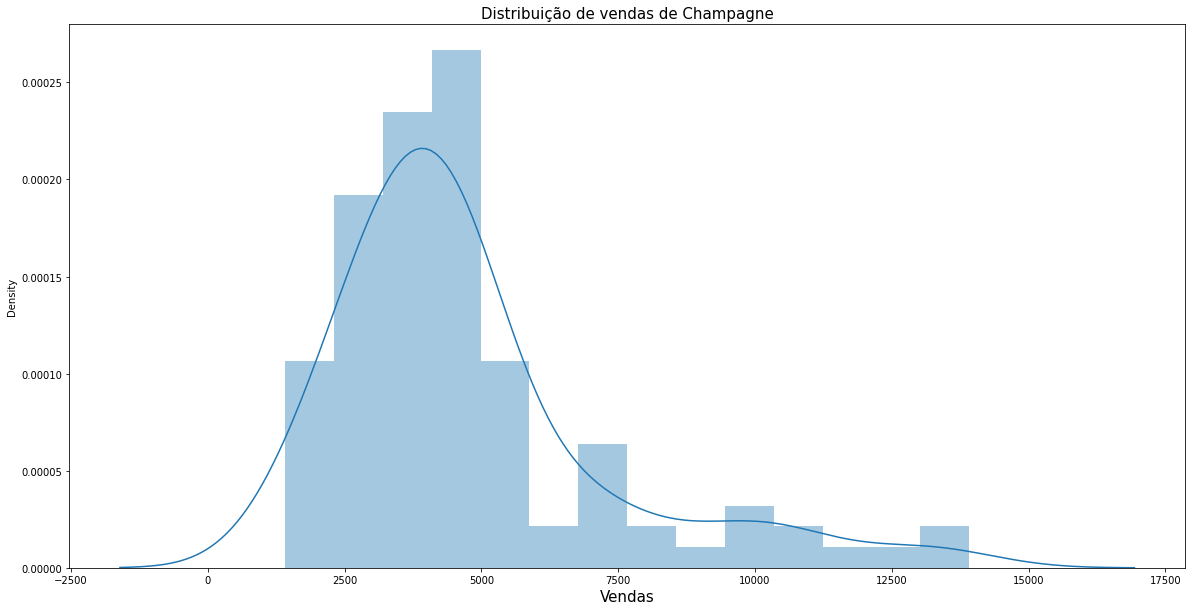

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(champagne['Sales'])
plt.xlabel('Vendas',size=15)
plt.title("Distribuição de vendas de Champagne",size=15);

Abaixo podemos ver que a série temporal possui uma sazonalidade bem destacada; vemos que ela tem muitos picos acentuados e essa sazonalidade parece aumentar ao longo do tempo.

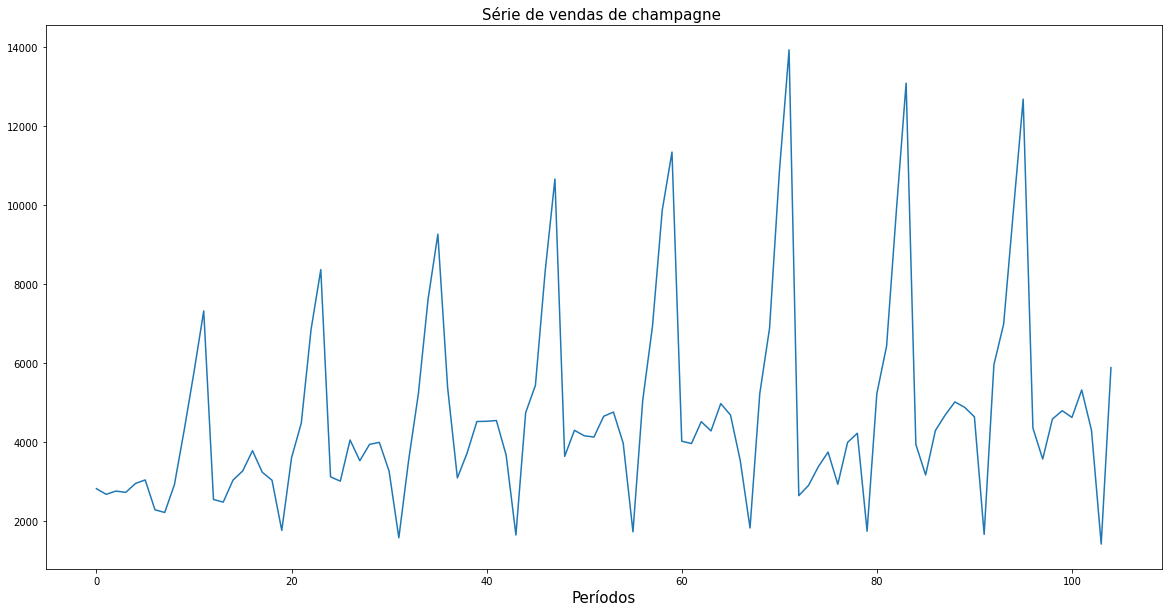

In [ ]:
plt.figure(figsize=(20,10))
champagne['Sales'].plot()
plt.xlabel('Períodos',size=15)
plt.ylabel('')
plt.title('Série de vendas de champagne ',size=15)
plt.show()

Vamos renomear as colunas da base de dados.

In [ ]:
champagne.columns=['ds','y']

## Separando os dados

Vamos separar os dados em uma base de treino (que usaremos no modelo do *Prophet*) e a base de teste (que iremos comparar com as previsões).

Separaremos os 30 meses finais para a base de teste.

In [ ]:
treino=champagne[:-30]
treino.shape

(75, 2)

In [ ]:
teste=champagne[-30:]
teste.shape

(30, 2)

## Modelagem com *Prophet*

Agora iremos aplicar a base de dados de treino no modelo e geraremos as previsões.

In [ ]:
prophet = Prophet(daily_seasonality=True,seasonality_mode='multiplicative',seasonality_prior_scale=1000).fit(treino)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
futuro=prophet.make_future_dataframe(periods=30, freq='MS')
previsoes=prophet.predict(futuro)

In [ ]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1964-01-01,2884.147764,1914.950392,3207.620506,2884.147764,2884.147764,0.124092,0.124092,0.124092,-0.103476,-0.103476,-0.103476,-0.227568,-0.227568,-0.227568,0.0,0.0,0.0,2585.708734
1,1964-02-01,2920.840147,1723.306504,2902.689781,2920.840147,2920.840147,0.124092,0.124092,0.124092,-0.201106,-0.201106,-0.201106,-0.325198,-0.325198,-0.325198,0.0,0.0,0.0,2333.442058
2,1964-03-01,2955.165279,2136.631872,3405.931446,2955.165279,2955.165279,0.124092,0.124092,0.124092,-0.054029,-0.054029,-0.054029,-0.178121,-0.178121,-0.178121,0.0,0.0,0.0,2795.499444
3,1964-04-01,2991.857662,2055.355463,3288.500579,2991.857662,2991.857662,0.124092,0.124092,0.124092,-0.106947,-0.106947,-0.106947,-0.231039,-0.231039,-0.231039,0.0,0.0,0.0,2671.886662
4,1964-05-01,3027.366419,2415.298995,3647.213091,3027.366419,3027.366419,0.124092,0.124092,0.124092,0.006630,0.006630,0.006630,-0.117462,-0.117462,-0.117462,0.0,0.0,0.0,3047.438488


In [ ]:
previsoes[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
98,1972-03-01,6063.956420,5434.323547,6661.077221
99,1972-04-01,5757.451814,5143.511156,6398.243539
100,1972-05-01,6525.364175,5893.111213,7189.397516
101,1972-06-01,6244.717532,5613.548076,6867.656578
102,1972-07-01,4958.401798,4404.474421,5558.494385
103,1972-08-01,2806.286528,2177.318962,3419.160704
104,1972-09-01,6341.291779,5716.241214,6971.237939


In [ ]:
validacao=pd.DataFrame({'ds':teste['ds']})
validacao['ds'].head()

75   1970-04-01
76   1970-05-01
77   1970-06-01
78   1970-07-01
79   1970-08-01
Name: ds, dtype: datetime64[ns]

In [ ]:
saida=prophet.predict(validacao)

In [ ]:
saida[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1970-04-01,5164.556371,4574.326842,5784.409584
1,1970-05-01,5612.571942,4989.601197,6211.292258
2,1970-06-01,5542.197360,4930.810504,6158.406318
3,1970-07-01,4540.980633,3949.930306,5136.909403
4,1970-08-01,2263.707291,1668.356864,2888.600429
5,1970-09-01,5795.264544,5157.768143,6384.284159
6,1970-10-01,7318.001450,6679.084223,7891.214998
7,1970-11-01,11006.000489,10384.340280,11573.117732
8,1970-12-01,13747.563544,13126.986060,14376.217981
9,1971-01-01,4957.453749,4345.728059,5575.727083


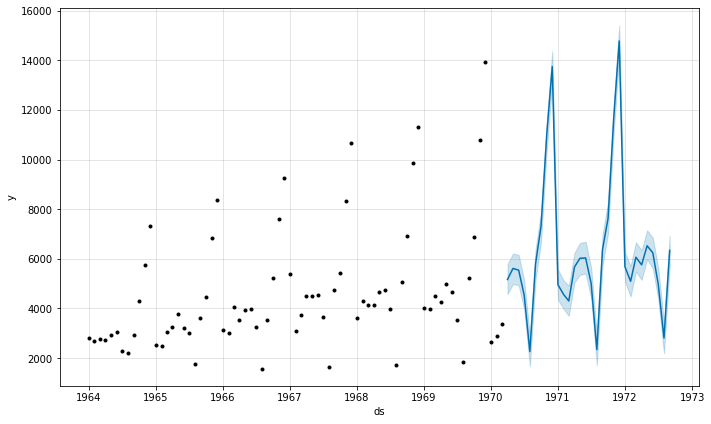

In [ ]:
prophet.plot(saida);

In [ ]:
saida.index=teste.index

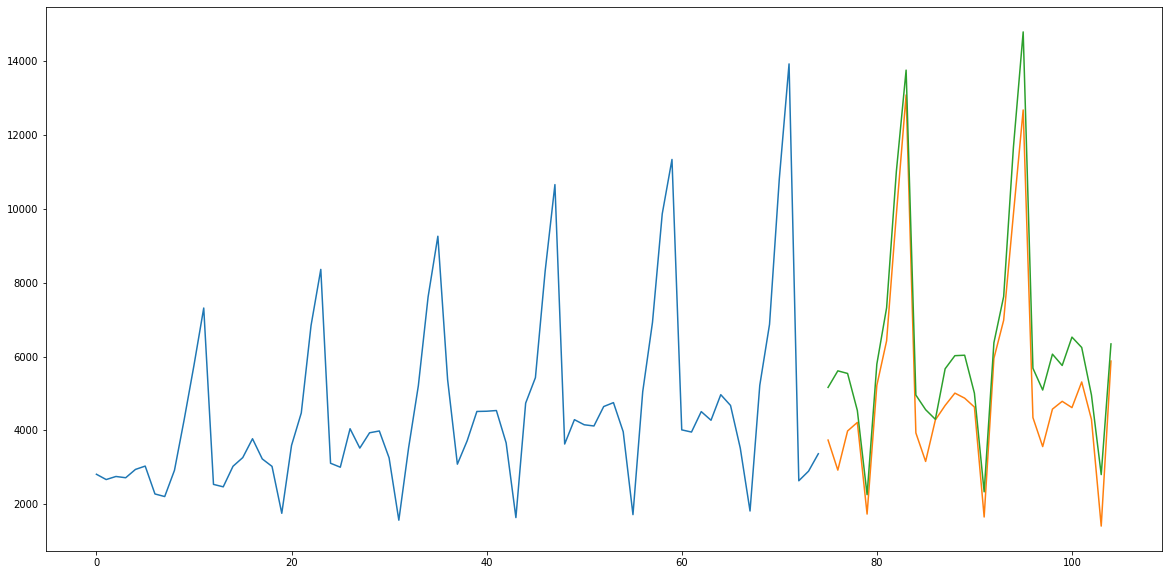

In [ ]:
plt.figure(figsize=(20,10))
treino['y'].plot()
teste['y'].plot()
saida['yhat'].plot();

Usando a métrica de avaliação RMSE tivemos um resultado de 1219.

In [ ]:
rmse(saida['yhat'],teste['y'])

1219.935111328177

Vamos agora plotar os componentes tendência e sazonalidade.

Vemos que a tendência é cresce linearmente.

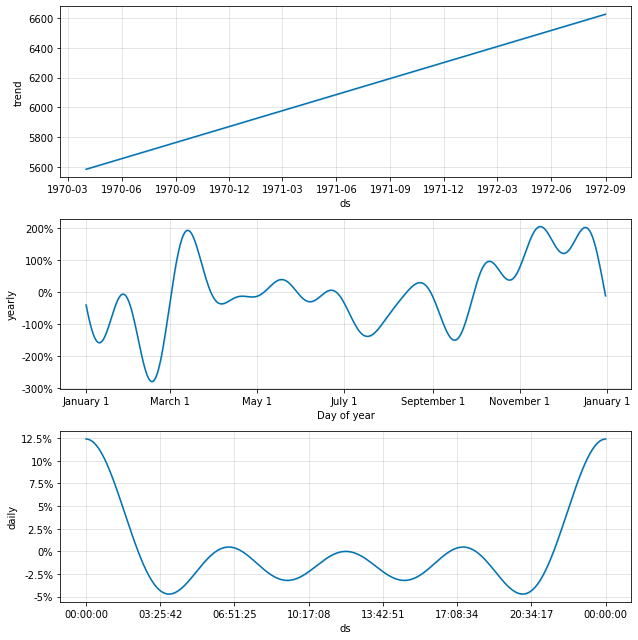

In [ ]:
prophet.plot_components(saida);

Agora iremos aplicar ao modelo toda a base de dados com o intuito de validar o nosso modelo.

Iremos realizar novamente todo o processo inserindo a base completa e renomeando algumas variáveis.

In [ ]:
prophet1 = Prophet(daily_seasonality=True,seasonality_mode='multiplicative',seasonality_prior_scale=1000).fit(champagne)
previsoes1=prophet1.predict(prophet1.make_future_dataframe(periods=30, freq='MS'))

saida1=prophet1.predict(pd.DataFrame({'ds':teste['ds']}))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Plotando as novas previsões.

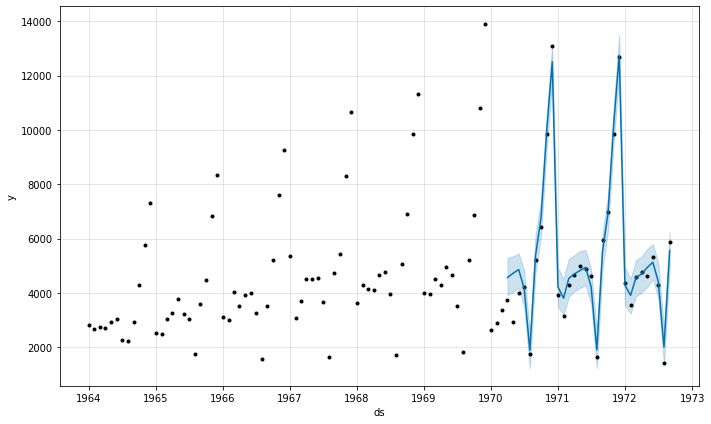

In [ ]:
prophet1.plot(saida1);

In [ ]:
saida1.index=teste.index

Comparando os resultados da validação.

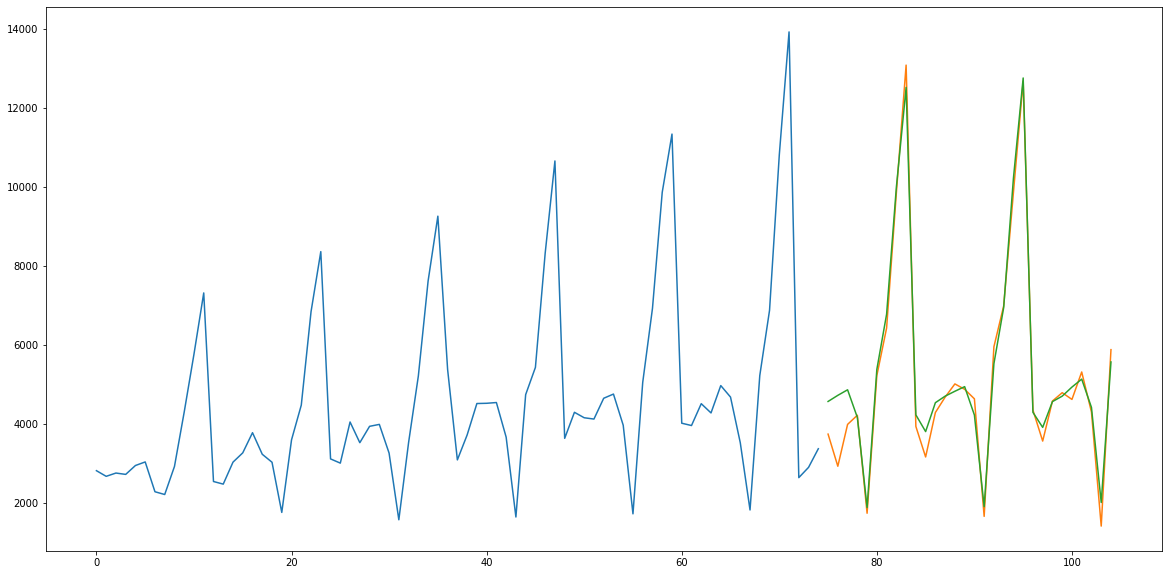

In [ ]:
plt.figure(figsize=(20,10))
treino['y'].plot()
teste['y'].plot()
saida1['yhat'].plot();

Agota temos um modelo com um RMSE menor do que o anterior.

In [ ]:
rmse(saida1['yhat'],teste['y'])

484.8672738885465

Tivemos uma queda percentual na nossa métrica de quase 61%.

In [ ]:
print((rmse(saida1['yhat'],teste['y'])-rmse(saida['yhat'],teste['y']))/rmse(saida['yhat'],teste['y'])*100,'%')

-60.254666876449015 %


E novamente iremos plotar os componentes, só que desse novo modelo.

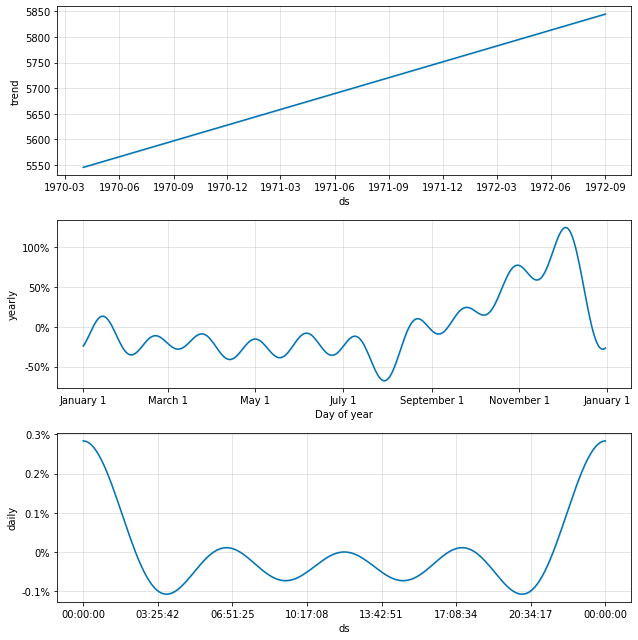

In [ ]:
prophet1.plot_components(saida1);